In [1]:
from wordcloud import WordCloud

from analytics.read import *
from analytics.preprocess import *
from analytics.analysis import *

# Input benchmark and target dataset list

In [2]:
dict_target = dict()

dict_target['benchmark'] = ['일취월장', '완공', '뼈아대'] 
dict_target['일취월장'] = ['일취월장'] 
dict_target['완공'] = ['완공'] 
dict_target['뼈아대'] = ['뼈아대'] 

dict_target['personal'] = ['Daily_Report', 'Weekly_Report', 'Monthly_Report', '글쓰기'] 
dict_target['멘토_브런치'] = ['멘토_브런치']
dict_target['신박사_브런치'] = ['신박사_브런치']
dict_target['신영준_페이스북'] = ['신영준_페이스북']
dict_target['연예_기사'] = ['연예_기사'] 

# Data Read

## .txt 읽은 dict

In [3]:
dict_target.keys()

dict_keys(['benchmark', '일취월장', '완공', '뼈아대', 'personal', '멘토_브런치', '신박사_브런치', '신영준_페이스북', '연예_기사'])

In [4]:
dict_strings = get_dict_strings(dict_target)

In [5]:
dict_merged_strings = get_dict_merged_strings(dict_strings)

## .txt을 읽은 dict -> noun의 list로

In [6]:
dict_nouns = get_nouns_from_topics(dict_merged_strings, komoran)

# Data Explore

In [7]:
for key in dict_nouns.keys():
    print('# of nouns in {0}: {1}'.format(key, len(dict_nouns[key])))

# of nouns in benchmark: 12357
# of nouns in 일취월장: 5691
# of nouns in 완공: 3457
# of nouns in 뼈아대: 3209
# of nouns in personal: 10084
# of nouns in 멘토_브런치: 3362
# of nouns in 신박사_브런치: 3818
# of nouns in 신영준_페이스북: 1606
# of nouns in 연예_기사: 1132


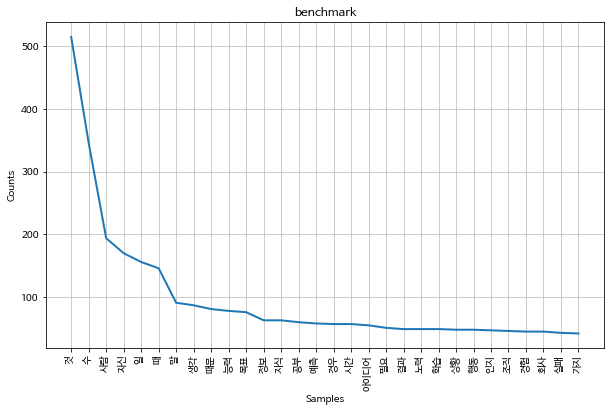

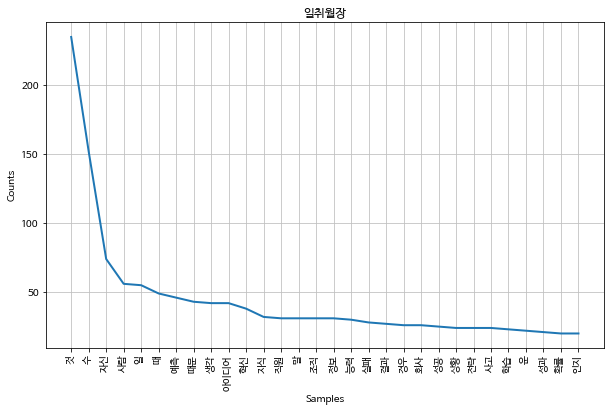

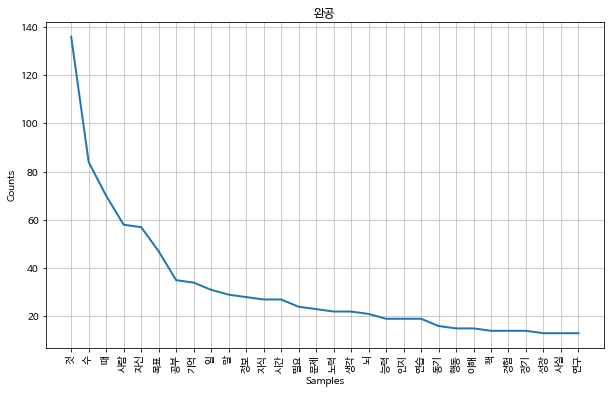

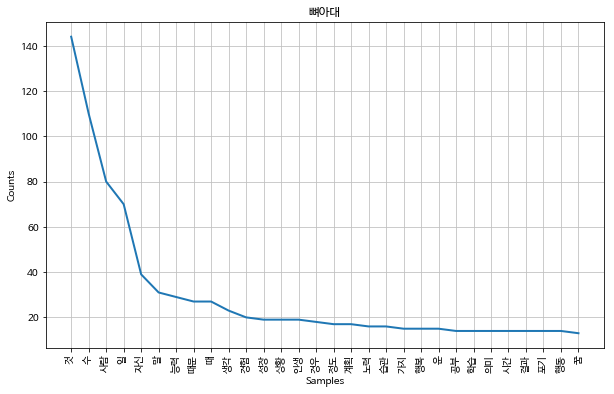

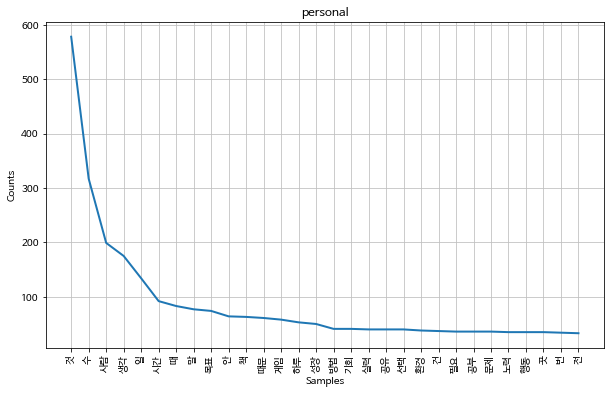

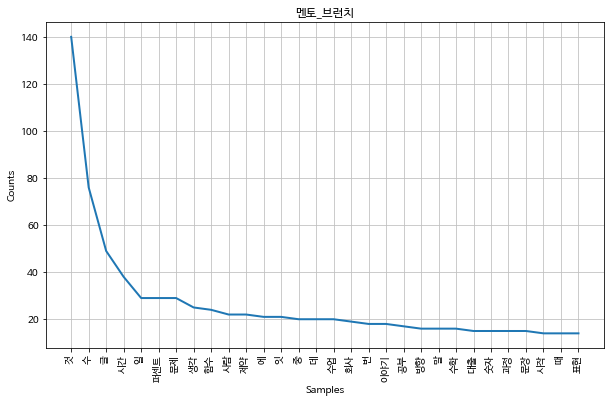

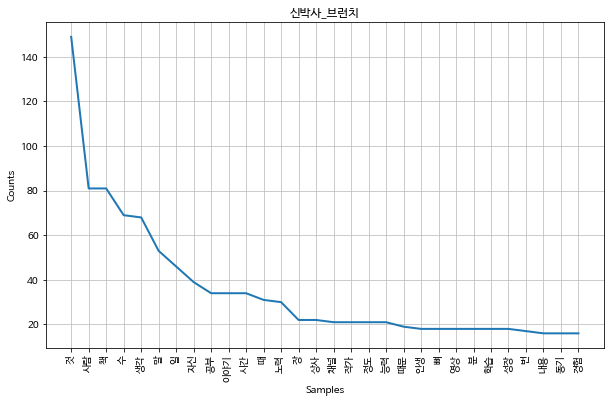

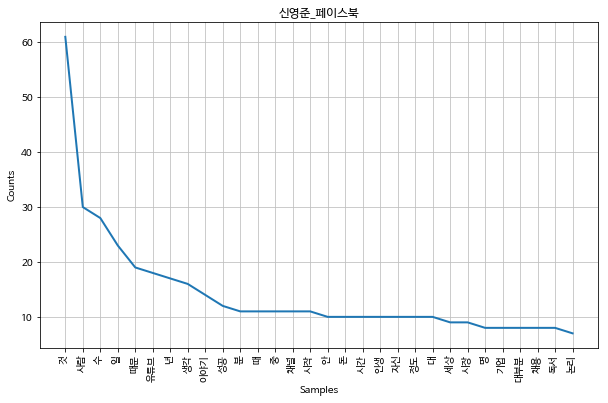

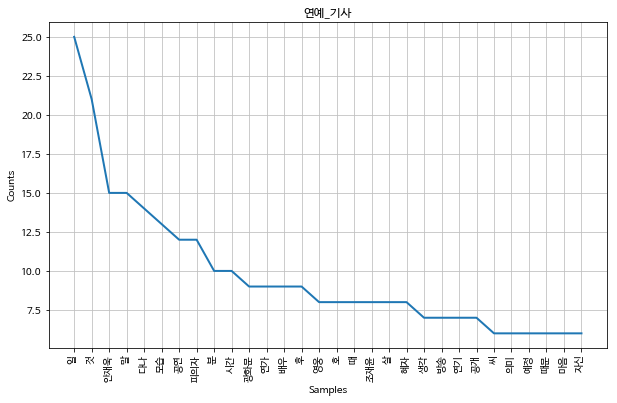

In [8]:
for category in dict_nouns.keys():
    plt.figure(figsize=(10, 6))
    plt.title(category)

    # 30개 noun 까지만 보여줌.
    Text(dict_nouns[category], name=category).plot(30)
    plt.show()

-> 지수적으로 떨어지는게 자연적인 모양. 오히려 지수적으로 떨어지지 않으면 데이터가 부족한 것이라 판단.

## noun 빈도수를 포함한 dict로

In [9]:
dict_frequency = get_nouns_frequency(dict_nouns)

# Data Preprocess

의미 부족한 단어 제거 (10 단어 이상의 경우만 체크함)

In [10]:
delete_words_benchmark = ['것', '수', '때', '때문', '경우', '필요', '가지', '정도', '뿐', '년', 
                          '등', '데' '개', '대부분', '번', '점', '관련', '전', '중', '자', '분', 
                          '만', '게', '동안', '뜻', '곳', '언가']
delete_words_personal = ['것', '수', '때', '안', '때문', '건', '필요', '곳', '번', '전', '중', '정도',
                         '년', '거', '점', '.so', '라고', '부분', '구체', '뿐', '자체', '가지', '밖',
                         '날', '분', '.com', '데', '개', '의', '을', '자', '션', '한', '회', '줄', '영',
                         '만', '명', '적', '시']
delete_words_huge_portion = ['사람', '자신', '일', '말', '생각']
delete_words = delete_words_benchmark + delete_words_personal + delete_words_huge_portion

In [11]:
dict_nouns_ppd = get_preprocessed_nouns(dict_nouns, delete_words)

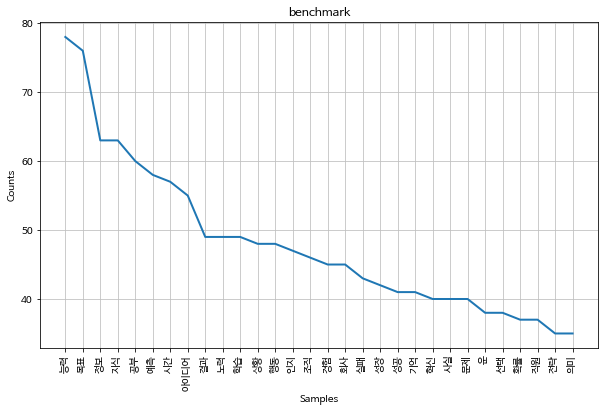

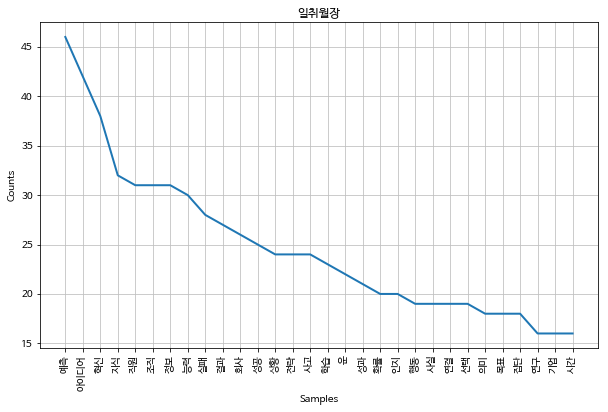

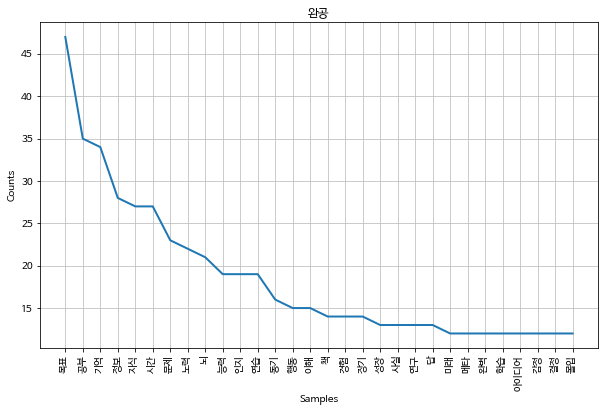

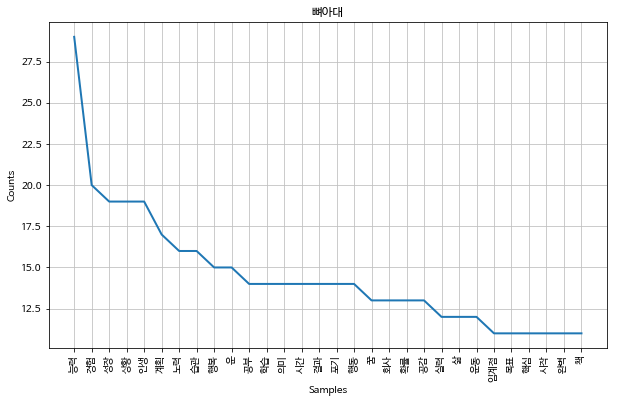

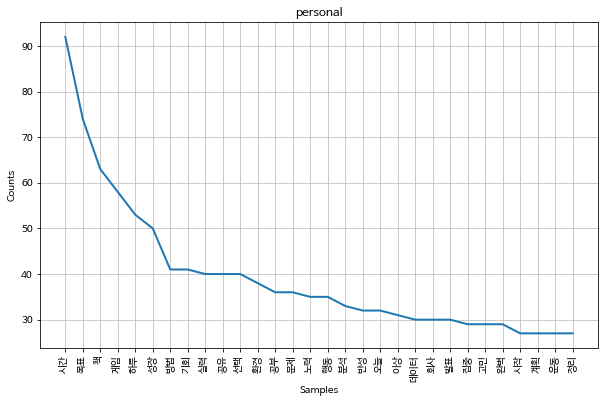

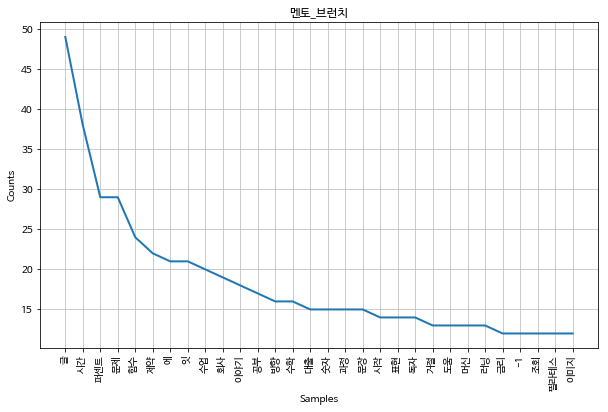

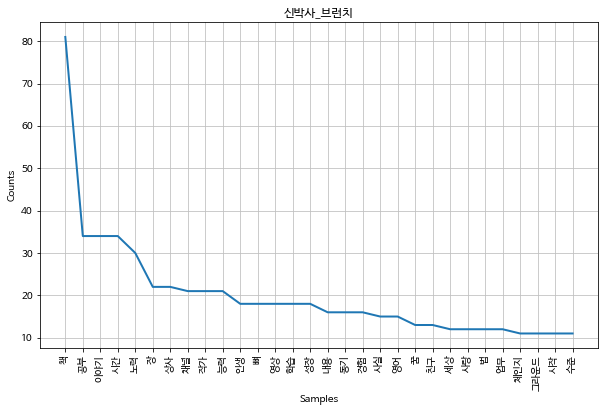

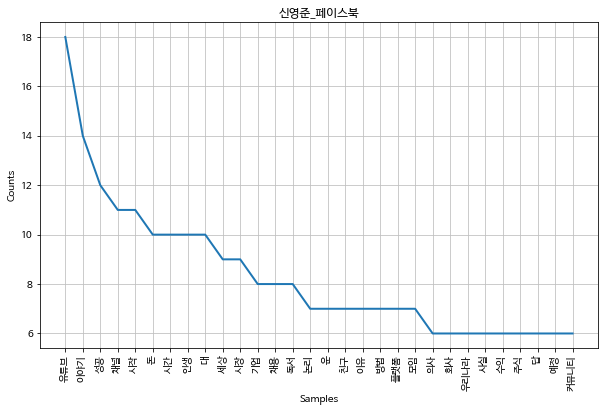

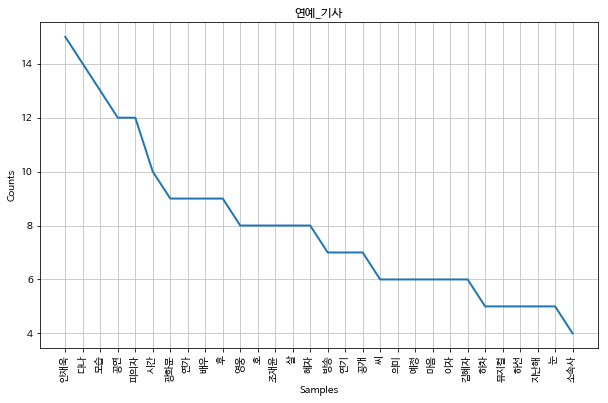

In [12]:
for category in dict_nouns_ppd.keys():
    plt.figure(figsize=(10, 6))
    plt.title(category)
    Text(dict_nouns_ppd[category], name=category).plot(30)
    plt.show()

In [13]:
dict_frequency_ppd = get_preprocessed_nouns_frequency(dict_frequency, delete_words)

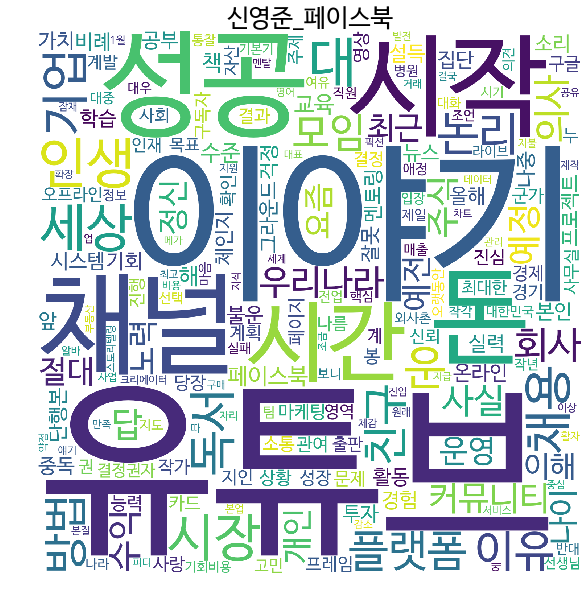

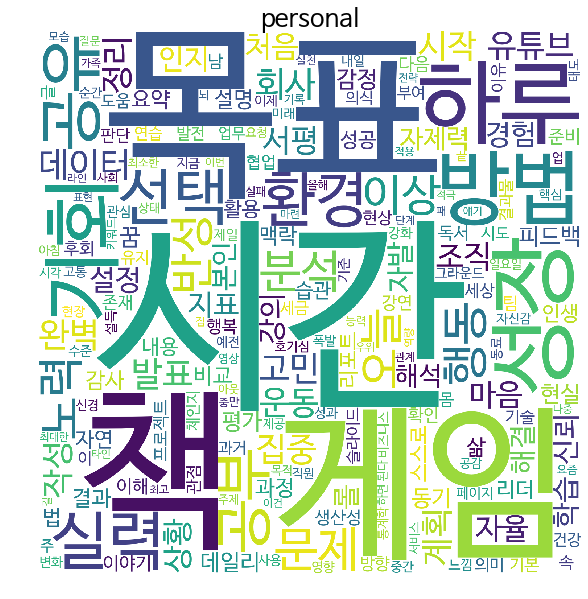

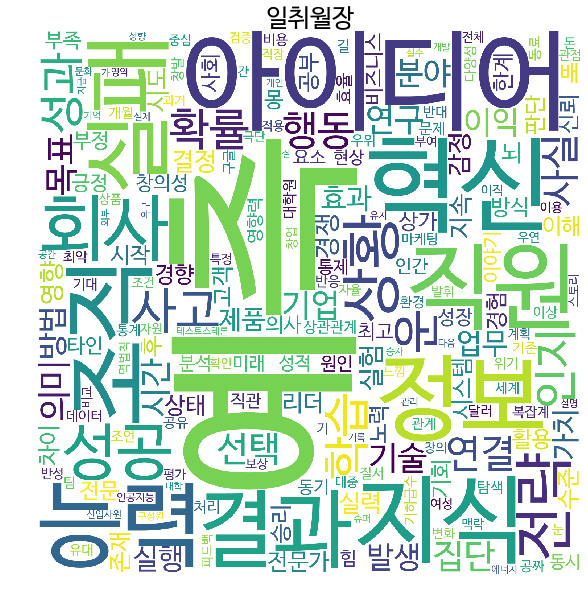

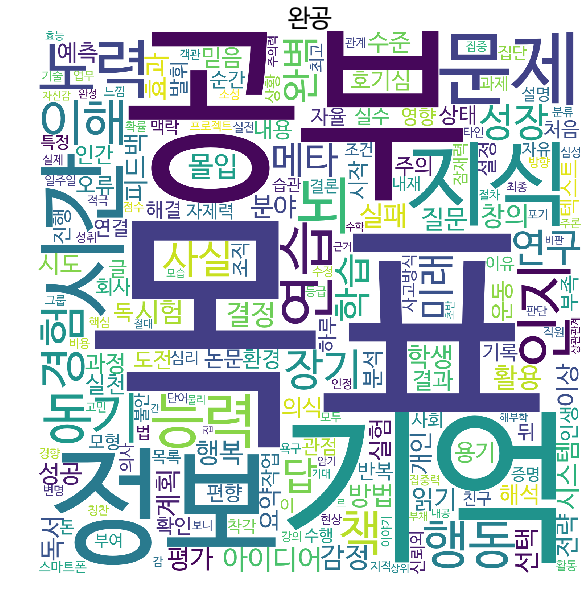

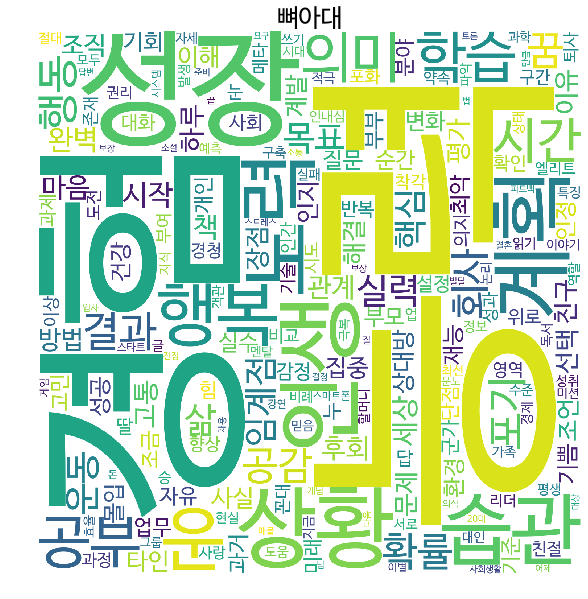

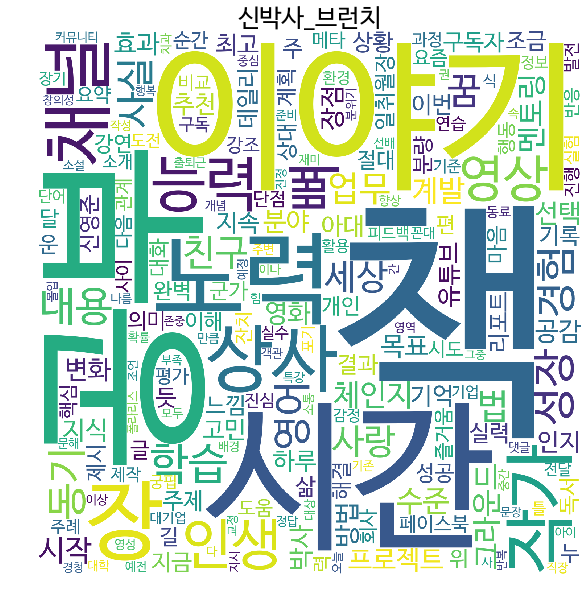

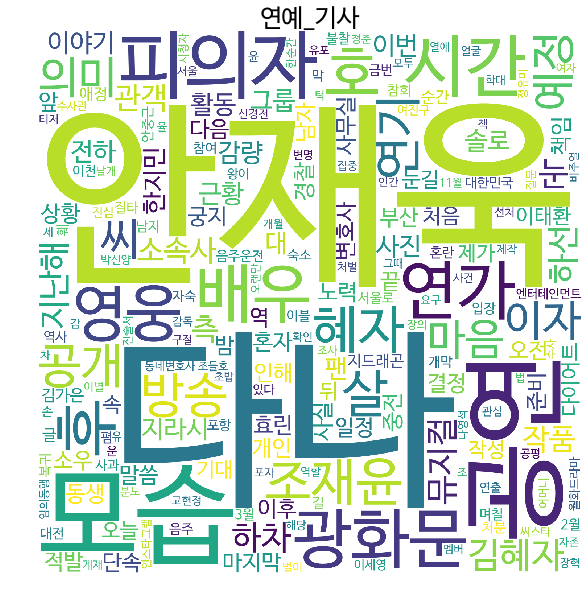

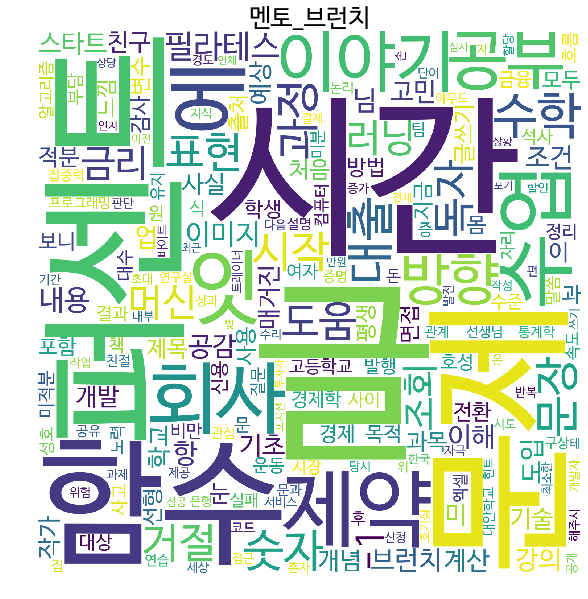

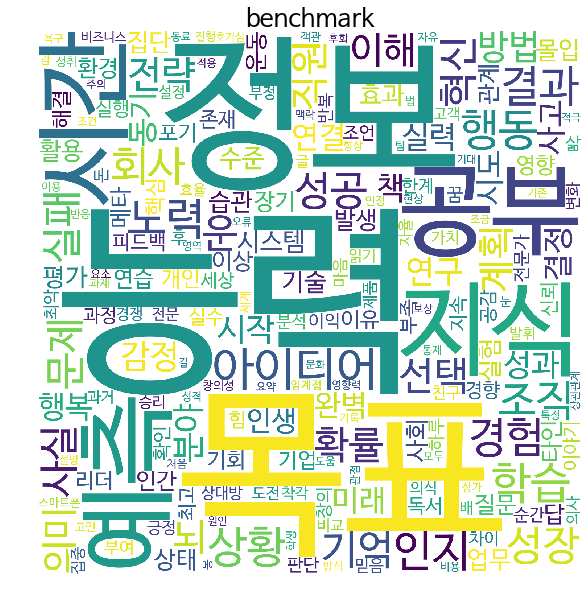

In [14]:
for category in set(dict_frequency_ppd.keys()):
    wc = WordCloud(width = 1500, height = 1500, background_color="white", font_path=font_path)
    plt.figure( figsize=(20,10))
    plt.title(category, fontsize=25)
    plt.imshow(wc.generate_from_frequencies(dict_frequency_ppd[category]))
    plt.axis("off")
    plt.show()

# Analysis

## sse_score

In [15]:
df_sse = pd.DataFrame()
for category_a in dict_frequency_ppd.keys():
    for category_b in dict_frequency_ppd.keys():
        df_sse = df_sse.append([[category_a, category_b,
                                get_score(
                                    dict_frequency_ppd[category_a], dict_frequency_ppd[category_b], 'sse')]],
                               ignore_index=True)
df_sse.columns = ['category_a', 'category_b', 'score']
df_sse.pivot(index='category_a', columns='category_b', values='score')
# pd.pivot_table(df_sse, index='category_a', columns='category_b', values='score')

category_b,benchmark,personal,멘토_브런치,뼈아대,신박사_브런치,신영준_페이스북,연예_기사,완공,일취월장
category_a,,,,,,,,,
benchmark,1.000000,0.966996,0.946822,0.970688,0.954158,0.949596,0.933480,0.971814,0.980389
personal,0.966996,1.000000,0.947837,0.960877,0.954972,0.948695,0.933068,0.957888,0.958019
멘토_브런치,0.946822,0.947837,1.000000,0.940875,0.938759,0.936706,0.926634,0.940192,0.942195
뼈아대,0.970688,0.960877,0.940875,1.000000,0.952004,0.945517,0.929502,0.954086,0.956583
신박사_브런치,0.954158,0.954972,0.938759,0.952004,1.000000,0.945136,0.926097,0.948465,0.945411
신영준_페이스북,0.949596,0.948695,0.936706,0.945517,0.945136,1.000000,0.926047,0.939572,0.945553
연예_기사,0.933480,0.933068,0.926634,0.929502,0.926097,0.926047,1.000000,0.925904,0.930617
완공,0.971814,0.957888,0.940192,0.954086,0.948465,0.939572,0.925904,1.000000,0.956507
일취월장,0.980389,0.958019,0.942195,0.956583,0.945411,0.945553,0.930617,0.956507,1.000000


In [16]:
# log_sse -> log는 의도와는 좀 다르게 나오는 것 같음. 전처리 의도는 맞는데 왜 그럴까?
df_sse = pd.DataFrame()
for category_a in dict_frequency_ppd.keys():
    for category_b in dict_frequency_ppd.keys():
        df_sse = df_sse.append([[category_a, category_b,
                                get_score(
                                    dict_frequency_ppd[category_a], dict_frequency_ppd[category_b], 'log_sse')]],
                               ignore_index=True)
df_sse.columns = ['category_a', 'category_b', 'score']
df_sse.pivot(index='category_a', columns='category_b', values='score')

category_b,benchmark,personal,멘토_브런치,뼈아대,신박사_브런치,신영준_페이스북,연예_기사,완공,일취월장
category_a,,,,,,,,,
benchmark,1.000000,0.980679,0.968160,0.977635,0.973140,0.962633,0.952168,0.978981,0.987153
personal,0.980679,1.000000,0.967892,0.971862,0.972429,0.962750,0.951658,0.971881,0.976431
멘토_브런치,0.968160,0.967892,1.000000,0.961502,0.963295,0.955176,0.947120,0.962633,0.965057
뼈아대,0.977635,0.971862,0.961502,1.000000,0.968871,0.958840,0.947886,0.968320,0.970260
신박사_브런치,0.973140,0.972429,0.963295,0.968871,1.000000,0.960940,0.948681,0.968148,0.969416
신영준_페이스북,0.962633,0.962750,0.955176,0.958840,0.960940,1.000000,0.943189,0.957446,0.960721
연예_기사,0.952168,0.951658,0.947120,0.947886,0.948681,0.943189,1.000000,0.947466,0.949746
완공,0.978981,0.971881,0.962633,0.968320,0.968148,0.957446,0.947466,1.000000,0.971898
일취월장,0.987153,0.976431,0.965057,0.970260,0.969416,0.960721,0.949746,0.971898,1.000000


In [17]:
# for column order
df_sse_pivot = df_sse.pivot(index='category_a', columns='category_b', values='score')
list_order = ['benchmark',
              'personal',
              '신박사_브런치',
              '신영준_페이스북',
              '멘토_브런치',
              '연예_기사',
              '뼈아대',
              '일취월장',
              '완공']
df_sse_pivot[list_order].reindex(index=list_order)

category_b,benchmark,personal,신박사_브런치,신영준_페이스북,멘토_브런치,연예_기사,뼈아대,일취월장,완공
category_a,,,,,,,,,
benchmark,1.000000,0.980679,0.973140,0.962633,0.968160,0.952168,0.977635,0.987153,0.978981
personal,0.980679,1.000000,0.972429,0.962750,0.967892,0.951658,0.971862,0.976431,0.971881
신박사_브런치,0.973140,0.972429,1.000000,0.960940,0.963295,0.948681,0.968871,0.969416,0.968148
신영준_페이스북,0.962633,0.962750,0.960940,1.000000,0.955176,0.943189,0.958840,0.960721,0.957446
멘토_브런치,0.968160,0.967892,0.963295,0.955176,1.000000,0.947120,0.961502,0.965057,0.962633
연예_기사,0.952168,0.951658,0.948681,0.943189,0.947120,1.000000,0.947886,0.949746,0.947466
뼈아대,0.977635,0.971862,0.968871,0.958840,0.961502,0.947886,1.000000,0.970260,0.968320
일취월장,0.987153,0.976431,0.969416,0.960721,0.965057,0.949746,0.970260,1.000000,0.971898
완공,0.978981,0.971881,0.968148,0.957446,0.962633,0.947466,0.968320,0.971898,1.000000


## LDA

### decide # of topics

In [18]:
documents = []
category = 'benchmark'
for sentence in [s for s in dict_merged_strings[category].split("\n") if s]:
    documents.append(' '.join([s for s in komoran.nouns(sentence) if s]))

In [19]:
n_topics = [i for i in range(2, 25)]
learning_decays = [round(0.35 + 0.05 * i, 2) for i in range(0, 4)]

In [20]:
# warning 은 .com , .so 제거하는 과정에서 발생.

list_perplexity = []

for ld in learning_decays:
    for n_components in n_topics:
        tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=delete_words)
        tf = tf_vectorizer.fit_transform(documents)
        tf_feature_names = tf_vectorizer.get_feature_names()

        # Run LDA
        lda = LatentDirichletAllocation(learning_decay = ld,
                                        n_components=n_components, max_iter=5, 
                                        learning_method='online', learning_offset=50.,random_state=0,
                                        doc_topic_prior=0.1, topic_word_prior=0.01,
                                       ).fit(tf)
        # perplexity
        tf_perplexity = lda.perplexity(tf)
        
        list_perplexity.append([n_components, ld, tf_perplexity])

df_perplexity = pd.DataFrame(list_perplexity, columns=['n_topics', 'learning_decay', 'perplexity'])

/anaconda3/envs/lda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['com', 'so'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


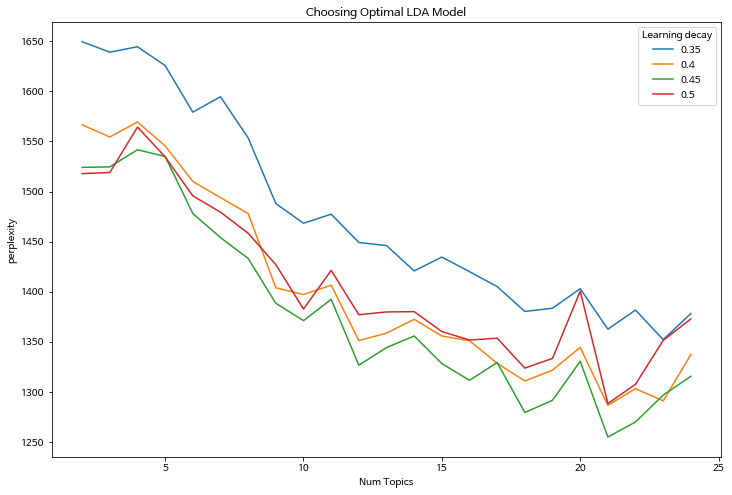

In [21]:
# reference: https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/
plt.figure(figsize=(12, 8))

for i in range(len(learning_decays)):
    plt.plot(n_topics, df_perplexity[df_perplexity.learning_decay==learning_decays[i]].perplexity, 
             label=learning_decays[i])

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("perplexity")
plt.legend(title='Learning decay', loc='best')
plt.show()

#### cluster 숫자 결정  
decided_n_components = 21  
decided_ld = 0.45

### topic clustering

In [22]:
# 클러스터 수, learning_decay 결정
decided_n_components = 21
decided_ld = 0.45

In [23]:
lda, lda_tf_feature_names = get_lda_model(dict_merged_strings, decided_ld, decided_n_components, 
                                          delete_words, category='benchmark')

In [24]:
# display
no_top_words = 10
display_topics(lda, lda_tf_feature_names, no_top_words)

Topic 0:
계획 업무 리더 계발 역할 자제력 쓰기 모습 스트레스 언어
Topic 1:
학습 습관 능력 전략 고민 장점 시대 효율 기하급수 스타트
Topic 2:
능력 포기 공감 사회 인간 시스템 스마트폰 이익 호랑이 손해
Topic 3:
방법 시도 마음 상태 이야기 사랑 개발 폭발 공짜 방식
Topic 4:
세상 고통 반응 세계 최선 공유 모형 프레임 대중 시점
Topic 5:
정보 핵심 아이디어 순간 활용 반복 최악 자유 단계 기존
Topic 6:
경험 몰입 과제 믿음 향상 극복 주변 생활 수행 불안
Topic 7:
사실 하루 독서 이용 약속 위로 상관관계 초기 거절 이후
Topic 8:
확률 성공 실패 조언 도전 군가 도움 보상 목록 경향
Topic 9:
공부 시간 노력 임계점 효과 조금 시험 승리 형성 구간
Topic 10:
행복 타인 연습 비교 대화 긍정 성취 영향 기쁨 착각
Topic 11:
회사 운동 친구 피드백 발생 적극 태도 퇴사 용기 부정
Topic 12:
분야 실력 지속 영역 전문가 전문 발휘 특정 경쟁 강연
Topic 13:
기억 직원 과거 장기 후회 건강 그룹 모두 특징 학생
Topic 14:
목표 성장 지식 인생 동기 환경 시작 부여 혁신 수준
Topic 15:
결과 감정 미래 연구 집중 재능 욕구 논문 요구 활동
Topic 16:
완벽 이상 아이디어 창의 연결 실행 자율 진행 비즈니스 관리
Topic 17:
행동 상황 평가 결정 이유 확인 설정 변화 의식 사고
Topic 18:
질문 부모 인정 호기심 고객 통제 대로 아이 문해 이메일
Topic 19:
의미 조직 관계 읽기 기회 정보 기술 판단 기준 설명
Topic 20:
인지 이해 문제 예측 해결 선택 실수 메타 상대방 과정


In [25]:
df_topic_clustering = get_lda_topic_clustering(lda, lda_tf_feature_names)
df_topic_clustering

,topic_words
topic_index,
0,"[계획, 업무, 리더, 계발, 역할, 자제력, 쓰기, 모습, 스트레스, 언어, 사용..."
1,"[학습, 습관, 능력, 전략, 고민, 장점, 시대, 효율, 기하급수, 스타트, 준비..."
2,"[능력, 포기, 공감, 사회, 인간, 시스템, 스마트폰, 이익, 호랑이, 손해, 소..."
3,"[방법, 시도, 마음, 상태, 이야기, 사랑, 개발, 폭발, 공짜, 방식, 자기, ..."
4,"[세상, 고통, 반응, 세계, 최선, 공유, 모형, 프레임, 대중, 시점, 겸손, ..."
5,"[정보, 핵심, 아이디어, 순간, 활용, 반복, 최악, 자유, 단계, 기존, 경청,..."
6,"[경험, 몰입, 과제, 믿음, 향상, 극복, 주변, 생활, 수행, 불안, 투자, 창..."
7,"[사실, 하루, 독서, 이용, 약속, 위로, 상관관계, 초기, 거절, 이후, 도착,..."
8,"[확률, 성공, 실패, 조언, 도전, 군가, 도움, 보상, 목록, 경향, 파악, 프..."


In [26]:
# 토픽별 단어 숫자
df_topic_clustering.topic_words.apply(lambda x: len(x))

topic_index
0      41
1      53
2      44
3      47
4      43
5      81
6      48
7      35
8      61
9      62
10     56
11     55
12     38
13     61
14    104
15     50
16     81
17     70
18     39
19     79
20     81
Name: topic_words, dtype: int64

In [27]:
# label 붙이기.
df_topic_clustering_label = df_topic_clustering.copy()
df_topic_clustering_label['topic_label'] = [
    '계획', 
    '학습', 
    '능력', 
    '마음',
    '세상',
    '정보와 아이디어',
    '믿음',
    '습관',
    '성공과 도전',
    '공부',
    '행복',
    '회사내 태도',
    '실력',
    '기억',
    '목표',
    '결과',
    '창의',
    '행동',
    '호기심',
    '조직',
    '메타인지',]

In [28]:
df_topic_clustering_label[['topic_label', 'topic_words']]

,topic_label,topic_words
topic_index,,
0,계획,"[계획, 업무, 리더, 계발, 역할, 자제력, 쓰기, 모습, 스트레스, 언어, 사용..."
1,학습,"[학습, 습관, 능력, 전략, 고민, 장점, 시대, 효율, 기하급수, 스타트, 준비..."
2,능력,"[능력, 포기, 공감, 사회, 인간, 시스템, 스마트폰, 이익, 호랑이, 손해, 소..."
3,마음,"[방법, 시도, 마음, 상태, 이야기, 사랑, 개발, 폭발, 공짜, 방식, 자기, ..."
4,세상,"[세상, 고통, 반응, 세계, 최선, 공유, 모형, 프레임, 대중, 시점, 겸손, ..."
5,정보와 아이디어,"[정보, 핵심, 아이디어, 순간, 활용, 반복, 최악, 자유, 단계, 기존, 경청,..."
6,믿음,"[경험, 몰입, 과제, 믿음, 향상, 극복, 주변, 생활, 수행, 불안, 투자, 창..."
7,습관,"[사실, 하루, 독서, 이용, 약속, 위로, 상관관계, 초기, 거절, 이후, 도착,..."
8,성공과 도전,"[확률, 성공, 실패, 조언, 도전, 군가, 도움, 보상, 목록, 경향, 파악, 프..."


## topic sse score

In [29]:
df_topic_scores = pd.DataFrame()
for category in ['personal', '뼈아대', '일취월장', '완공', '신박사_브런치', '신영준_페이스북', '멘토_브런치', '연예_기사']:
    df_topic_score = get_topic_scores(
        dict_frequency_ppd['benchmark'], dict_frequency_ppd[category], df_topic_clustering)
    df_topic_score.columns = ['{}_score'.format(category)]
    
    df_topic_scores = pd.concat([df_topic_scores, df_topic_score], axis=1)

In [30]:
df_topic_label_score = pd.merge(df_topic_clustering_label[['topic_label']], df_topic_scores,
                                left_index=True, right_index=True)
df_topic_label_score.reset_index(inplace=True)
df_topic_label_score.set_index(['topic_index', 'topic_label'], inplace=True)

df_topic_label_score

,,personal_score,뼈아대_score,일취월장_score,완공_score,신박사_브런치_score,신영준_페이스북_score,멘토_브런치_score,연예_기사_score
topic_index,topic_label,,,,,,,,
0,계획,0.866495,0.886810,0.855691,0.859892,0.750386,0.774725,0.629981,0.352739
1,학습,0.776805,0.877298,0.903546,0.906886,0.826702,0.770661,0.594229,0.408447
2,능력,0.826980,0.846787,0.885791,0.905869,0.806652,0.778282,0.585489,0.662400
3,마음,0.848822,0.859444,0.928098,0.890548,0.706670,0.718152,0.745874,0.620542
4,세상,0.687468,0.829687,0.861431,0.780458,0.780974,0.621461,0.696077,0.413725
5,정보와 아이디어,0.842659,0.832602,0.929167,0.884855,0.784279,0.730734,0.720483,0.439273
6,믿음,0.848073,0.889248,0.888661,0.884760,0.827165,0.689067,0.719094,0.454466
7,습관,0.680236,0.817412,0.860560,0.877820,0.825860,0.532437,0.589571,0.542762
8,성공과 도전,0.862187,0.892515,0.931318,0.880492,0.834278,0.674012,0.721899,0.623747


In [31]:
n_top_bottom_topic = 3

In [32]:
df_top_n_topics = pd.DataFrame()
for column in df_topic_label_score.columns:
    df_top_n_topics = df_top_n_topics.append(
        [['_'.join(column.split('_')[:-1]),
         df_topic_label_score.reset_index().nlargest(
             n_top_bottom_topic, column).topic_label.to_list(),
         df_topic_label_score.reset_index().nlargest(
             n_top_bottom_topic, column)[column].mean()]], ignore_index=True)
df_top_n_topics.columns = ['category', 'strong_topics', 'strong_topics_mean_scores']
df_top_n_topics.set_index('category', inplace=True)

In [33]:
df_bottom_n_topics = pd.DataFrame()
for column in df_topic_label_score.columns:
    df_bottom_n_topics = df_bottom_n_topics.append(
        [['_'.join(column.split('_')[:-1]),
         df_topic_label_score.reset_index().nsmallest(
             n_top_bottom_topic, column).topic_label.to_list(),
         df_topic_label_score.reset_index().nsmallest(
             n_top_bottom_topic, column)[column].mean()]], ignore_index=True)
df_bottom_n_topics.columns = ['category', 'weak_topics', 'weak_topics_mean_scores']
df_bottom_n_topics.set_index('category', inplace=True)

In [34]:
df_strong_weak_topics = pd.merge(df_top_n_topics, df_bottom_n_topics, 
                                 left_index=True, right_index=True)
df_strong_weak_topics

,strong_topics,strong_topics_mean_scores,weak_topics,weak_topics_mean_scores
category,,,,
personal,"[행동, 계획, 목표]",0.868590,"[습관, 세상, 학습]",0.714837
뼈아대,"[메타인지, 공부, 성공과 도전]",0.901321,"[호기심, 습관, 기억]",0.817605
일취월장,"[조직, 창의, 실력]",0.942421,"[호기심, 계획, 습관]",0.853126
완공,"[행동, 학습, 능력]",0.906766,"[세상, 호기심, 기억]",0.785826
신박사_브런치,"[목표, 행동, 공부]",0.859713,"[마음, 결과, 기억]",0.727644
신영준_페이스북,"[행동, 공부, 목표]",0.812307,"[호기심, 습관, 세상]",0.546954
멘토_브런치,"[결과, 목표, 조직]",0.796131,"[능력, 습관, 학습]",0.589763
연예_기사,"[기억, 조직, 능력]",0.674441,"[계획, 학습, 세상]",0.391637
